# Mapping out LA Crime Trends

## Introduction:
The following project will investigate crime trends from 2020 up to 12/06/2023.

#### The following questions will be investigated:
* Has crime been increasing in LA, do trends vary by region, victim age, ethnicity, or victim sex?
* What month has the most incidents of crime, least incidents, how might this vary by region, and victim demographics?
* What day of the week has the most incidents of crime, least incidents, how might this vary by region and victim demographics?
* Are certain crimes more prevelent during certain months, days of the week?
* Are there certain times of the day crimes are more likely to occurr, how might this vary depending on the crime?
* Are victims of a certain age and or demographic more likely to be a victim of a crime?

#### Importance: 
* Budgeting could be allocated to increase patrols in areas where crimes are more prevelent and or increase patrols during certain months, days of the week, and or the time of the day.
* Communities could create programs to help deter certain crimes by knowing when and were they are likely to happen.
* City officials can help organize crime deterrant programs and or help in advising citizens on how to better protect themselves. 

#### Data Analysis process: 
1. Exploring the data
2. Data cleaning and transformation using Python Pandas and Microsoft SQL Server
3. Data analysis using Python Pandas
4. Creating visuals and charts for data visualization using Matplotlib and Seaborn  
5. Final report will consist of charts created through Matplotlib and Seaborn
6. If applicable, create an interactive dashboard using Tableau


#### Link to dataset
https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data 

* Dataset was last updated 12/06/2023

#### Data dictionary
* DR_NO: Division of records number, made up of 2 digit year, area ID and 5 digits
* Date Rptd: MM/DD/YYYY date and time
* Date Occ: MM/DD/YYYY date and time
* Time Occ: 24 hour military time
* Area: LAPD has 21 community police stations referred as Geographic areas within the departments and are numbered sequentially from 1-21.
* Area Name: The actual name of the area in reference to 'Area'
* Rpt Dist No: 4-digit code representing a sub-area within a geographic area. 
* Crm Cd: Indicates the crime committed (Same as Crime Code 1)
* Crm Cd Desc: Defines the crime code provided
* Mocodes: Modus Operandi: Activities associated with the suspect in commission of the crime
* Vict Age: Two character numeric value
* Vict sex: F - Female, M - Male, X - Unknown
* Vict Desc: A - Other Asian, B - Black, C - Chinese, D - Cambodian, F - Filipino, G - Guamanian, H - Hispanic/Latin/Mexican, I - American Indian/Alaskan Native, J - Japanese, K - Korean, L - Laotian, O - Other, P - Pacific Islander, S - Samoan, U - Hawaiian, V - Vietnamese, W - White, X - Unknown, Z - Asian Indian
* Premis Cd: Type of structure, vehicle, or location where the crime took place
* Premise Desc: Defines the Premises Code provided
* Weapon used Cd: Type of weapon used in the crime
* Weapon Desc: Defines the weapon used in the code provided above
* Status: Status of the case (IC is the default)
* Status Desc: Defines the Status Code provided
* Crm Cd 1: Indicates the crime committed. Crime Code 1 is the primary and most serious one, Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class nubmers are more serious.
* Crm Cd 2: May contain code for an additional crime, less serious than Crime Code 1.
* Crm Cd 3: May contain code for an additional crime, less serious than Crime Code 1.
* Crm Cd 4: May contain a code for an additional crime, less serious than Crime Code 1.
* Location: Street address of crime incident rounded to the nearest hundred block to maintain anonymity
* Cross Street: Cross street of rounded address
* LAT: Latitude
* LON: Longitude

In [1]:
# Load the Python Libraries 
import numpy as np
import pandas as pd
import seaborn as sbn 
import matplotlib.pyplot as plt

In [2]:
# Import the dataset and save as a dataframe
la_crime = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

### Exploratory Data Analysis
* Getting familiarized with the dataset
* How late into 2023 is there data provided
* General statistics
* Number of null values
* Number of rows and columns
* Making notes for when beginning the data cleaning and transormation process


In [3]:
# Explor the dataset
# Retrieve the first six rows 
la_crime.head(6)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,1/8/2020 0:00,1/8/2020,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,1/2/2020 0:00,1/1/2020,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,4/14/2020 0:00,2/13/2020,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,1/1/2020 0:00,1/1/2020,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,1/1/2020 0:00,1/1/2020,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
5,200100501,1/2/2020 0:00,1/1/2020,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,NaN,NaN,700 S BROADWAY,NaN,34.0452,-118.2534


In [4]:
# Returning the number of rows, number of columns, and number of elements
row, column = la_crime.shape
print(f'Rows: {row}')
print(f'Columns: {column}')
print(f'Number of elements: {la_crime.size}')
 

Rows: 852950
Columns: 28
Number of elements: 23882600


In [5]:
# The earliest date for a crime occurring and most recent crime occurring 
print(la_crime['DATE OCC'].min())
print(la_crime['DATE OCC'].max())
print(la_crime['DATE OCC'].sort_values)
print(la_crime['DATE OCC'].dtype) # Data type showing as object, will need to be converted to a date datatype

1/1/2020
9/9/2023
<bound method Series.sort_values of 0          1/8/2020
1          1/1/2020
2         2/13/2020
3          1/1/2020
4          1/1/2020
            ...    
852945    3/22/2023
852946    4/12/2023
852947     7/1/2023
852948     3/5/2023
852949    11/9/2023
Name: DATE OCC, Length: 852950, dtype: object>
object


In [6]:
la_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852950 entries, 0 to 852949
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           852950 non-null  int64  
 1   Date Rptd       852950 non-null  object 
 2   DATE OCC        852950 non-null  object 
 3   TIME OCC        852950 non-null  int64  
 4   AREA            852950 non-null  int64  
 5   AREA NAME       852950 non-null  object 
 6   Rpt Dist No     852950 non-null  int64  
 7   Part 1-2        852950 non-null  int64  
 8   Crm Cd          852950 non-null  int64  
 9   Crm Cd Desc     852950 non-null  object 
 10  Mocodes         734639 non-null  object 
 11  Vict Age        852950 non-null  int64  
 12  Vict Sex        740344 non-null  object 
 13  Vict Descent    740336 non-null  object 
 14  Premis Cd       852940 non-null  float64
 15  Premis Desc     852432 non-null  object 
 16  Weapon Used Cd  296748 non-null  float64
 17  Weapon Des

In [7]:
# Exploring columns of interest that will be used in the analysis from top to bottom based on information provided above
print(la_crime['AREA NAME'].unique())

['Southwest' 'Central' 'N Hollywood' 'Mission' 'Devonshire' 'Northeast'
 'Harbor' 'Van Nuys' 'West Valley' 'West LA' 'Wilshire' 'Pacific'
 'Rampart' '77th Street' 'Hollenbeck' 'Southeast' 'Hollywood' 'Newton'
 'Topanga' 'Foothill' 'Olympic']


In [8]:
la_crime['TIME OCC'] 

0         2230
1          330
2         1200
3         1730
4          415
          ... 
852945    1000
852946    1630
852947       1
852948     900
852949    2300
Name: TIME OCC, Length: 852950, dtype: int64

In [9]:
print(sorted(la_crime['Crm Cd'].unique())) # Wanting to see the lowest value as it indicates most serious crime
print()
print(la_crime['Crm Cd'].nunique())
 

[110, 113, 121, 122, 210, 220, 230, 231, 235, 236, 237, 250, 251, 310, 320, 330, 331, 341, 343, 345, 347, 349, 350, 351, 352, 353, 354, 410, 420, 421, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 450, 451, 452, 470, 471, 473, 474, 475, 480, 485, 487, 510, 520, 522, 622, 623, 624, 625, 626, 627, 647, 648, 649, 651, 652, 653, 654, 660, 661, 662, 664, 666, 668, 670, 740, 745, 753, 755, 756, 760, 761, 762, 763, 805, 806, 810, 812, 813, 814, 815, 820, 821, 822, 830, 840, 845, 850, 860, 865, 870, 880, 882, 884, 886, 888, 890, 900, 901, 902, 903, 904, 906, 910, 920, 921, 922, 924, 928, 930, 931, 932, 933, 940, 942, 943, 944, 946, 948, 949, 950, 951, 954, 956]

138


In [10]:
print(la_crime['Status Desc'].unique())

['Adult Other' 'Invest Cont' 'Adult Arrest' 'Juv Arrest' 'Juv Other' 'UNK']


In [11]:
print(sorted(la_crime['Crm Cd 1'].unique()))
print()
print(la_crime['Crm Cd 1'].nunique())

[110.0, 113.0, 121.0, 122.0, 210.0, 220.0, 230.0, 231.0, 235.0, 236.0, 237.0, 250.0, 251.0, 310.0, 320.0, 330.0, 331.0, 341.0, 343.0, 345.0, 347.0, 349.0, 350.0, 351.0, 352.0, 353.0, 354.0, 410.0, 420.0, 421.0, 430.0, 432.0, 433.0, 434.0, 435.0, 436.0, 437.0, 438.0, 439.0, 440.0, 441.0, 442.0, 443.0, 444.0, 445.0, 446.0, 450.0, 451.0, 452.0, 470.0, 471.0, 473.0, 474.0, 475.0, 480.0, 485.0, 487.0, 510.0, 520.0, 521.0, 522.0, 622.0, 623.0, 624.0, 625.0, 626.0, 627.0, 647.0, 648.0, 649.0, 651.0, 652.0, 653.0, 654.0, 660.0, 661.0, 662.0, 664.0, 666.0, 668.0, 670.0, 740.0, 745.0, 753.0, 755.0, 756.0, 760.0, 761.0, 762.0, 763.0, 805.0, 806.0, 810.0, 812.0, 813.0, 814.0, 815.0, 820.0, 821.0, 822.0, 830.0, 840.0, 845.0, 850.0, 860.0, 865.0, 870.0, 880.0, 882.0, 884.0, 886.0, 888.0, 890.0, 900.0, 901.0, 902.0, 903.0, 904.0, 906.0, 910.0, 920.0, 921.0, 922.0, 924.0, 928.0, 930.0, 931.0, 932.0, 933.0, 940.0, 942.0, 943.0, 944.0, 946.0, 949.0, 950.0, 954.0, nan, 948.0, 951.0, 956.0]

140


In [12]:
print(la_crime['Premis Desc'].unique())
print()
print(la_crime['Premis Desc'].nunique())

['SINGLE FAMILY DWELLING' 'SIDEWALK' 'POLICE FACILITY'
 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)' 'BEAUTY SUPPLY STORE'
 'NIGHT CLUB (OPEN EVENINGS ONLY)' 'DEPARTMENT STORE' 'OTHER BUSINESS'
 'STREET' 'PARKING LOT' 'HOTEL'
 "COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, ETC.)" 'ALLEY'
 'CONDOMINIUM/TOWNHOUSE' 'PUBLIC RESTROOM/OUTSIDE*' 'GARAGE/CARPORT'
 'MTA BUS' 'NURSING/CONVALESCENT/RETIREMENT HOME' 'MINI-MART'
 'VEHICLE, PASSENGER/TRUCK' 'OTHER STORE' 'GROUP HOME'
 'MTA - RED LINE - UNION STATION' 'RESTAURANT/FAST FOOD'
 'MTA - RED LINE - PERSHING SQUARE' 'DRUG STORE'
 'GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)'
 "SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS"
 'PARKING UNDERGROUND/BUILDING' 'MOTEL' 'HOSPITAL' 'DRIVEWAY' 'MARKET'
 'LA UNION STATION (NOT LINE SPECIFIC)' 'MISSIONS/SHELTERS'
 'BAR/COCKTAIL/NIGHTCLUB' 'TOW YARD*' 'DETENTION/JAIL FACILITY'
 'OTHER PREMISE' 'CELL PHONE STORE' 'CLOTHING STORE' 'BANK'
 'MTA - BLUE LINE - 7TH AND METRO CENTER' 'OTHER/OUTSIDE'
 'S

306


In [13]:
la_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852950 entries, 0 to 852949
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           852950 non-null  int64  
 1   Date Rptd       852950 non-null  object 
 2   DATE OCC        852950 non-null  object 
 3   TIME OCC        852950 non-null  int64  
 4   AREA            852950 non-null  int64  
 5   AREA NAME       852950 non-null  object 
 6   Rpt Dist No     852950 non-null  int64  
 7   Part 1-2        852950 non-null  int64  
 8   Crm Cd          852950 non-null  int64  
 9   Crm Cd Desc     852950 non-null  object 
 10  Mocodes         734639 non-null  object 
 11  Vict Age        852950 non-null  int64  
 12  Vict Sex        740344 non-null  object 
 13  Vict Descent    740336 non-null  object 
 14  Premis Cd       852940 non-null  float64
 15  Premis Desc     852432 non-null  object 
 16  Weapon Used Cd  296748 non-null  float64
 17  Weapon Des

In [14]:
# To make further exploratory analysis easier and knowing which columns will not be used, dropping unnecessary columns

# Columns to be dropped: DR_NO, Date Rptd, Rpt Dist No, Part 1-2, Mocodes, Premis Desc, Weapon Desc, Status, Crm Cd 1, 2, 3, 
# and 4, Cross Street
la_crime.drop(['DR_NO', 'Date Rptd', 'Rpt Dist No', 'Part 1-2', 'Mocodes', 'Premis Desc', 'Weapon Desc',
              'Status', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street'], axis = 1, inplace = True)

In [15]:
# Should have 15 columns remaining
la_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852950 entries, 0 to 852949
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE OCC        852950 non-null  object 
 1   TIME OCC        852950 non-null  int64  
 2   AREA            852950 non-null  int64  
 3   AREA NAME       852950 non-null  object 
 4   Crm Cd          852950 non-null  int64  
 5   Crm Cd Desc     852950 non-null  object 
 6   Vict Age        852950 non-null  int64  
 7   Vict Sex        740344 non-null  object 
 8   Vict Descent    740336 non-null  object 
 9   Premis Cd       852940 non-null  float64
 10  Weapon Used Cd  296748 non-null  float64
 11  Status Desc     852950 non-null  object 
 12  LOCATION        852950 non-null  object 
 13  LAT             852950 non-null  float64
 14  LON             852950 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 97.6+ MB


In [16]:
# General statistics
la_crime.describe()

,TIME OCC,AREA,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,LAT,LON
count,852950.000000,852950.000000,852950.000000,852950.000000,852940.000000,296748.000000,852950.000000,852950.000000
mean,1336.294750,10.707354,500.746338,29.742191,305.974292,363.225141,33.983232,-118.040106
std,653.603076,6.097178,207.705242,21.799470,216.950442,123.685519,1.756263,6.089068
min,1.000000,1.000000,110.000000,-3.000000,101.000000,101.000000,0.000000,-118.667600
25%,900.000000,6.000000,331.000000,5.000000,101.000000,310.000000,34.014100,-118.429700
50%,1415.000000,11.000000,442.000000,31.000000,203.000000,400.000000,34.058500,-118.321500
75%,1900.000000,16.000000,626.000000,45.000000,501.000000,400.000000,34.163200,-118.273900
max,2359.000000,21.000000,956.000000,120.000000,976.000000,516.000000,34.334300,0.000000


In [17]:
# Including data types that are string(object)
la_crime.describe(include = ['object'])

,DATE OCC,AREA NAME,Crm Cd Desc,Vict Sex,Vict Descent,Status Desc,LOCATION
count,852950,852950,852950,740344,740336,852950,852950
unique,1434,21,138,5,20,6,64317
top,12/2/2022,Central,VEHICLE - STOLEN,M,H,Invest Cont,800 N ALAMEDA ST
freq,1130,57691,91473,351362,261145,683107,1581


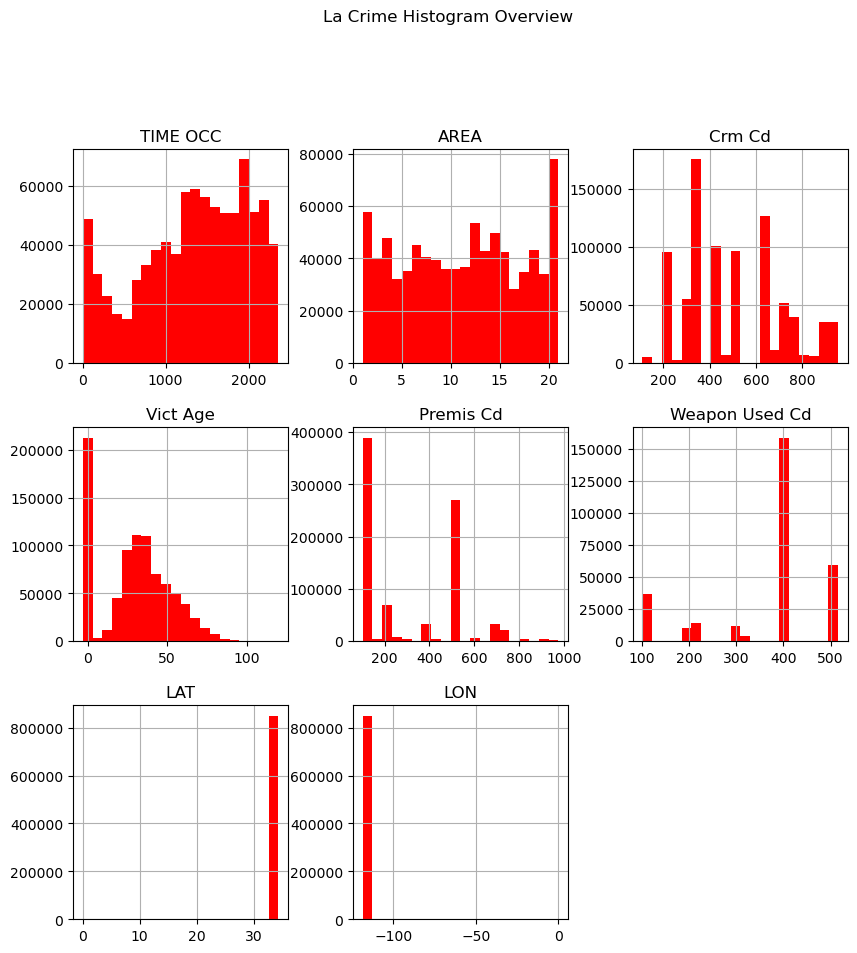

In [18]:
la_crime.hist(figsize = (10, 10), bins = 20, color = 'red')
plt.suptitle("La Crime Histogram Overview", y = 1.02)
plt.show()

Victim age has a lot of values of around zero or less, this will involve further exploration.

In [19]:
# Retrieve the number of null values for each column
la_crime.isnull().sum()

DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Crm Cd                 0
Crm Cd Desc            0
Vict Age               0
Vict Sex          112606
Vict Descent      112614
Premis Cd             10
Weapon Used Cd    556202
Status Desc            0
LOCATION               0
LAT                    0
LON                    0
dtype: int64

In [20]:
# Weapon Used Cd has a lot of null values 
la_crime['Weapon Used Cd'].unique()
# Column has minimal to no use for this analysis so will be dropped

array([400., 500.,  nan, 306., 511., 204., 302., 212., 109., 304., 218.,
       102., 515., 307., 216., 308., 215., 207., 104., 200., 506., 214.,
       221., 113., 201., 504., 501., 312., 106., 512., 311., 208., 107.,
       301., 223., 219., 205., 114., 303., 101., 206., 513., 211., 103.,
       115., 116., 305., 110., 503., 514., 508., 310., 309., 203., 112.,
       122., 120., 505., 105., 516., 220., 510., 210., 213., 509., 502.,
       108., 507., 217., 123., 111., 119., 202., 209., 300., 125., 121.,
       118., 117., 124.])

In [21]:
la_crime.drop(['Weapon Used Cd'], axis = 1, inplace = True)

In [22]:
la_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852950 entries, 0 to 852949
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DATE OCC      852950 non-null  object 
 1   TIME OCC      852950 non-null  int64  
 2   AREA          852950 non-null  int64  
 3   AREA NAME     852950 non-null  object 
 4   Crm Cd        852950 non-null  int64  
 5   Crm Cd Desc   852950 non-null  object 
 6   Vict Age      852950 non-null  int64  
 7   Vict Sex      740344 non-null  object 
 8   Vict Descent  740336 non-null  object 
 9   Premis Cd     852940 non-null  float64
 10  Status Desc   852950 non-null  object 
 11  LOCATION      852950 non-null  object 
 12  LAT           852950 non-null  float64
 13  LON           852950 non-null  float64
dtypes: float64(3), int64(4), object(7)
memory usage: 91.1+ MB


### Data Cleaning/Transformation
* Rename columns for easier readability
* Change data types as needed
* Fill in "Unknown", for null values in the "Vict Sex" and "Vict Descent" columns
* Drop rows with null values in the "Premis CD" column
* Create a day_of_the_week and month column from the date_occurred column
* Further explore the "Vict Age" column to see if rows with very high and low values need to be dropped or an advanced method can be used to fill in these rows with a median or predicted age based on other variables (columns) in the DataFrame

In [23]:
# Renaming all columns in the dataseet
la_crime.columns = ['date_occurred', 'time_occurred', 'area', 'area_name', 'crime_code', 'crime_code_desc',
                   'victim_age', 'victim_sex', 'ethnicity', 'premis_code', 'status_desc', 'location', 'latitude',
                   'longitude']

In [24]:
la_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852950 entries, 0 to 852949
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date_occurred    852950 non-null  object 
 1   time_occurred    852950 non-null  int64  
 2   area             852950 non-null  int64  
 3   area_name        852950 non-null  object 
 4   crime_code       852950 non-null  int64  
 5   crime_code_desc  852950 non-null  object 
 6   victim_age       852950 non-null  int64  
 7   victim_sex       740344 non-null  object 
 8   ethnicity        740336 non-null  object 
 9   premis_code      852940 non-null  float64
 10  status_desc      852950 non-null  object 
 11  location         852950 non-null  object 
 12  latitude         852950 non-null  float64
 13  longitude        852950 non-null  float64
dtypes: float64(3), int64(4), object(7)
memory usage: 91.1+ MB


In [25]:
# Change the date_occured column from an string to a datetime value
la_crime['date_occurred'] = pd.to_datetime(la_crime['date_occurred'], format='%m/%d/%Y')
la_crime['date_occurred'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 852950 entries, 0 to 852949
Series name: date_occurred
Non-Null Count   Dtype         
--------------   -----         
852950 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 6.5 MB


In [26]:
# Create a month column from the date_occurred column
la_crime['month_name'] = la_crime['date_occurred'].dt.month_name()

# Select a sample of rows to see if the date_occurred matches to the correct month
la_crime[['date_occurred', 'month_name']].sample(10)

,date_occurred,month_name
698054,2023-08-31,August
655865,2023-03-10,March
509696,2022-03-02,March
454842,2022-01-23,January
419615,2022-12-10,December
181575,2020-05-11,May
599560,2022-10-09,October
78200,2020-08-25,August
448547,2022-11-04,November
710767,2023-09-18,September


In [27]:
# Following the same process as above to create a day of the week column
la_crime['day_of_week'] = la_crime['date_occurred'].dt.day_name() 

# Returning a sample of rows to include the two newly created columns

la_crime[['date_occurred', 'month_name', 'day_of_week']].sample(10)


,date_occurred,month_name,day_of_week
36181,2020-12-26,December,Saturday
832785,2023-09-19,September,Tuesday
451055,2022-09-01,September,Thursday
292269,2021-02-03,February,Wednesday
546948,2022-06-23,June,Thursday
642712,2022-12-13,December,Tuesday
699811,2023-05-01,May,Monday
161277,2020-12-27,December,Sunday
348699,2021-01-17,January,Sunday
345426,2021-07-02,July,Friday


In [28]:
# Determining the number of null values in the premis_code columnn
la_crime['premis_code'].isnull().sum()

# Dropping those rows

la_crime = la_crime.dropna(subset= ['premis_code'])

la_crime['premis_code'].isnull().sum()

0

In [29]:
# Replace null values in the victim sex with "X"
la_crime['victim_sex'].fillna('X', inplace = True) 
# la_crime.info()

In [30]:
# Same steps as above for the ethnicity column 
la_crime['ethnicity'].fillna('X', inplace = True)
la_crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 852940 entries, 0 to 852949
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date_occurred    852940 non-null  datetime64[ns]
 1   time_occurred    852940 non-null  int64         
 2   area             852940 non-null  int64         
 3   area_name        852940 non-null  object        
 4   crime_code       852940 non-null  int64         
 5   crime_code_desc  852940 non-null  object        
 6   victim_age       852940 non-null  int64         
 7   victim_sex       852940 non-null  object        
 8   ethnicity        852940 non-null  object        
 9   premis_code      852940 non-null  float64       
 10  status_desc      852940 non-null  object        
 11  location         852940 non-null  object        
 12  latitude         852940 non-null  float64       
 13  longitude        852940 non-null  float64       
 14  month_name       852940 n

In [31]:
# Checking for any remaining nulls in the dataframe
la_crime.isnull().sum()

date_occurred      0
time_occurred      0
area               0
area_name          0
crime_code         0
crime_code_desc    0
victim_age         0
victim_sex         0
ethnicity          0
premis_code        0
status_desc        0
location           0
latitude           0
longitude          0
month_name         0
day_of_week        0
dtype: int64

#### Further exploration of the age column to see about either dropping rows or using imputation 
* Convert rows that are of age zero or less to nulls and then use imputation to fill in those nulls
* Check to see the number of occurrences for very high age values to see if those rows should be dropped

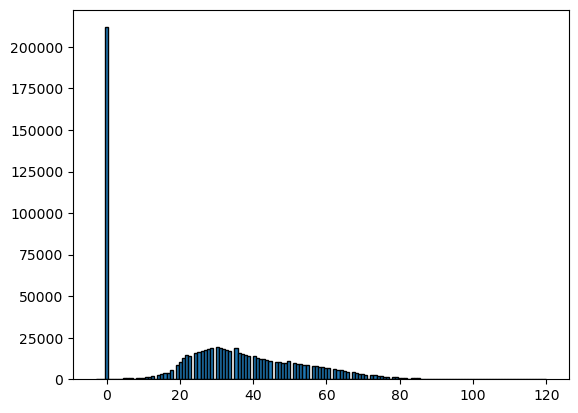

In [32]:
# Using a histogram to see the distribution of victim ages
plt.hist(la_crime['victim_age'], bins='auto', edgecolor='black') 
plt.show()

In [33]:
# Maximum, Minimum, Mean and Median victim ages
max_age = la_crime['victim_age'].max()
print(f'Maximum age: {max_age}')

min_age = la_crime['victim_age'].min()
print(f'Minimum age: {min_age}')

mean_age = la_crime['victim_age'].mean()
print(f'Mean age: {mean_age}')

median_age = la_crime['victim_age'].median()
print(f'Median age: {median_age}')


Maximum age: 120
Minimum age: -3
Mean age: 29.742473093066334
Median age: 31.0


* One person has lived passed the age of 120 and they are in france so this row will have its value corrected via imputation.
* Rows with values of 0 or less may have been errors and or unknowns so these rows will be treated as unknowns and an imputation method will be used to determine predicted age values

In [34]:
la_crime[la_crime['victim_age'] > 99]

,date_occurred,time_occurred,area,area_name,crime_code,crime_code_desc,victim_age,victim_sex,ethnicity,premis_code,status_desc,location,latitude,longitude,month_name,day_of_week
99891,2020-04-19,2145,8,West LA,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",120,X,X,101.0,Invest Cont,2000 S BEDFORD ST,34.0416,-118.3836,April,Sunday


In [35]:
la_crime[la_crime['victim_age'] <= 0]

,date_occurred,time_occurred,area,area_name,crime_code,crime_code_desc,victim_age,victim_sex,ethnicity,premis_code,status_desc,location,latitude,longitude,month_name,day_of_week
2,2020-02-13,1200,1,Central,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,Adult Arrest,200 E 6TH ST,34.0448,-118.2474,February,Thursday
7,2020-01-04,40,1,Central,946,OTHER MISCELLANEOUS CRIME,0,X,X,726.0,Invest Cont,200 E 6TH ST,34.0448,-118.2474,January,Saturday
9,2020-05-26,1925,17,Devonshire,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0,X,X,203.0,Adult Other,11900 BALBOA BL,34.2864,-118.5021,May,Tuesday
13,2020-01-07,1638,1,Central,648,ARSON,0,X,X,404.0,Invest Cont,700 W 7TH ST,34.0480,-118.2577,January,Tuesday
33,2020-09-03,2000,1,Central,510,VEHICLE - STOLEN,0,X,X,707.0,Invest Cont,500 N FIGUEROA ST,34.0615,-118.2470,September,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852904,2023-11-23,1005,1,Central,440,THEFT PLAIN - PETTY ($950 & UNDER),0,X,X,502.0,Invest Cont,900 W TEMPLE ST,34.0607,-118.2494,November,Thursday
852916,2023-04-20,900,13,Newton,510,VEHICLE - STOLEN,0,X,X,101.0,Invest Cont,900 E JEFFERSON BL,34.0136,-118.2611,April,Thursday
852926,2023-03-19,122,4,Hollenbeck,510,VEHICLE - STOLEN,0,X,X,101.0,Invest Cont,3200 GARNET ST,34.0248,-118.2076,March,Sunday
852928,2023-04-29,600,6,Hollywood,510,VEHICLE - STOLEN,0,X,X,101.0,Invest Cont,1800 WINONA BL,34.1038,-118.3020,April,Saturday


In [36]:
211907/852940

0.248443032335217

* If these rows were to be deleted that would be nearly a quarter of the data that is missing.
* This could possibliy result in bias in the analysis. 
* These values will be changed to nulls and then imputation will be used to fill in those nulls.

In [37]:
# Change the row with 120, and all other rows with zero or less to nulls
la_crime['victim_age'].replace(120, np.nan, inplace = True)
la_crime['victim_age'].replace(0, np.nan, inplace = True)
la_crime['victim_age'].replace(-1, np.nan, inplace = True)
la_crime['victim_age'].replace(-2, np.nan, inplace = True)
la_crime['victim_age'].replace(-3, np.nan, inplace = True)

In [38]:
la_crime['victim_age'].isnull().sum()

211908

In [39]:
la_crime['victim_age'].describe()

count    641032.000000
mean         39.574489
std          15.594425
min           2.000000
25%          28.000000
50%          37.000000
75%          50.000000
max          99.000000
Name: victim_age, dtype: float64

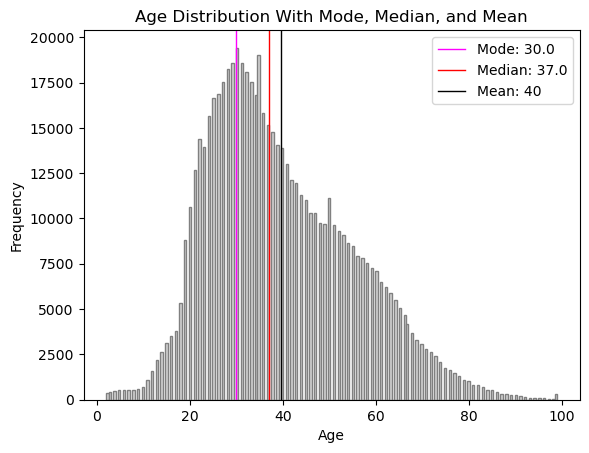

In [40]:
mode_age = la_crime['victim_age'].mode()[0]
median_age = la_crime['victim_age'].median()
mean_age = la_crime['victim_age'].mean() 

plt.hist(la_crime['victim_age'], bins='auto', edgecolor='grey', color = 'lightgrey') 

# Adding the mean, median, and mode lines
plt.axvline(mode_age, color = 'magenta', linestyle = '-', linewidth = 1, label=f'Mode: {mode_age}')
plt.axvline(median_age, color = 'Red', linestyle = '-', linewidth = 1, label = f'Median: {median_age}')
plt.axvline(mean_age, color = 'black', linestyle = '-', linewidth = 1, label = f'Mean: {round(mean_age)}')

plt.title("Age Distribution With Mode, Median, and Mean")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()

* It appears that most crime victims are in their 20s and 30s, with the Interquartile Range (IQR) being between 28 and 50 years


* Research an imputation method to change the nulls into a predicted age value
* Ideally, using a method that will best predict the proper ages. 
* Methods used in the past have resulted in a huge spike at a particular age group.

In [41]:
la_crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 852940 entries, 0 to 852949
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date_occurred    852940 non-null  datetime64[ns]
 1   time_occurred    852940 non-null  int64         
 2   area             852940 non-null  int64         
 3   area_name        852940 non-null  object        
 4   crime_code       852940 non-null  int64         
 5   crime_code_desc  852940 non-null  object        
 6   victim_age       641032 non-null  float64       
 7   victim_sex       852940 non-null  object        
 8   ethnicity        852940 non-null  object        
 9   premis_code      852940 non-null  float64       
 10  status_desc      852940 non-null  object        
 11  location         852940 non-null  object        
 12  latitude         852940 non-null  float64       
 13  longitude        852940 non-null  float64       
 14  month_name       852940 n

In [42]:
# Group the data by area', crime code, victim sex, and ethnicity, and use the use these mediann values to fill nulls
# Creating a Dataframe based on medians of the grouped rows
grouped_data_medians = la_crime.groupby(['area', 'crime_code', 'victim_sex', 'ethnicity'
                                          ])['victim_age'].median().reset_index() 
grouped_data_medians.head(15)

,area,crime_code,victim_sex,ethnicity,victim_age
0,1,110,F,B,31.0
1,1,110,F,H,35.0
2,1,110,F,W,28.0
3,1,110,M,B,42.0
4,1,110,M,C,59.0
5,1,110,M,F,58.0
6,1,110,M,H,33.5
7,1,110,M,O,40.0
8,1,110,M,W,56.5
9,1,121,F,A,25.0


In [43]:
# Replacing null values based on the grouped median values

# Merging the grouped_data_medians DataFrame with the la_crime Dataframe
la_crime = la_crime.merge(grouped_data_medians, on = [ 'area', 'crime_code', 'victim_sex', 'ethnicity'
                                                      ], how = 'left', suffixes = ('', '_median'))
la_crime.head(8)

,date_occurred,time_occurred,area,area_name,crime_code,crime_code_desc,victim_age,victim_sex,ethnicity,premis_code,status_desc,location,latitude,longitude,month_name,day_of_week,victim_age_median
0,2020-01-08,2230,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36.0,F,B,501.0,Adult Other,1100 W 39TH PL,34.0141,-118.2978,January,Wednesday,38.0
1,2020-01-01,330,1,Central,624,BATTERY - SIMPLE ASSAULT,25.0,M,H,102.0,Invest Cont,700 S HILL ST,34.0459,-118.2545,January,Wednesday,36.0
2,2020-02-13,1200,1,Central,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,NaN,X,X,726.0,Adult Arrest,200 E 6TH ST,34.0448,-118.2474,February,Thursday,NaN
3,2020-01-01,1730,15,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76.0,F,W,502.0,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019,January,Wednesday,43.0
4,2020-01-01,415,19,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31.0,X,X,409.0,Invest Cont,14400 TITUS ST,34.2198,-118.4468,January,Wednesday,23.0
5,2020-01-01,30,1,Central,121,"RAPE, FORCIBLE",25.0,F,H,735.0,Invest Cont,700 S BROADWAY,34.0452,-118.2534,January,Wednesday,31.0
6,2020-01-02,1315,1,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23.0,M,H,404.0,Invest Cont,700 S FIGUEROA ST,34.0483,-118.2631,January,Thursday,24.0
7,2020-01-04,40,1,Central,946,OTHER MISCELLANEOUS CRIME,NaN,X,X,726.0,Invest Cont,200 E 6TH ST,34.0448,-118.2474,January,Saturday,54.0


In [44]:
# Fill in the null values with the median from the grouped data
la_crime['victim_age'] = la_crime['victim_age'].fillna(la_crime['victim_age_median']).astype(float)
la_crime.head(8)


,date_occurred,time_occurred,area,area_name,crime_code,crime_code_desc,victim_age,victim_sex,ethnicity,premis_code,status_desc,location,latitude,longitude,month_name,day_of_week,victim_age_median
0,2020-01-08,2230,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36.0,F,B,501.0,Adult Other,1100 W 39TH PL,34.0141,-118.2978,January,Wednesday,38.0
1,2020-01-01,330,1,Central,624,BATTERY - SIMPLE ASSAULT,25.0,M,H,102.0,Invest Cont,700 S HILL ST,34.0459,-118.2545,January,Wednesday,36.0
2,2020-02-13,1200,1,Central,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,NaN,X,X,726.0,Adult Arrest,200 E 6TH ST,34.0448,-118.2474,February,Thursday,NaN
3,2020-01-01,1730,15,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76.0,F,W,502.0,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019,January,Wednesday,43.0
4,2020-01-01,415,19,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31.0,X,X,409.0,Invest Cont,14400 TITUS ST,34.2198,-118.4468,January,Wednesday,23.0
5,2020-01-01,30,1,Central,121,"RAPE, FORCIBLE",25.0,F,H,735.0,Invest Cont,700 S BROADWAY,34.0452,-118.2534,January,Wednesday,31.0
6,2020-01-02,1315,1,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23.0,M,H,404.0,Invest Cont,700 S FIGUEROA ST,34.0483,-118.2631,January,Thursday,24.0
7,2020-01-04,40,1,Central,946,OTHER MISCELLANEOUS CRIME,54.0,X,X,726.0,Invest Cont,200 E 6TH ST,34.0448,-118.2474,January,Saturday,54.0


In [45]:
 la_crime.drop(columns=['victim_age_median'], inplace = True)

In [46]:
la_crime['victim_age'].isnull().sum()

86213

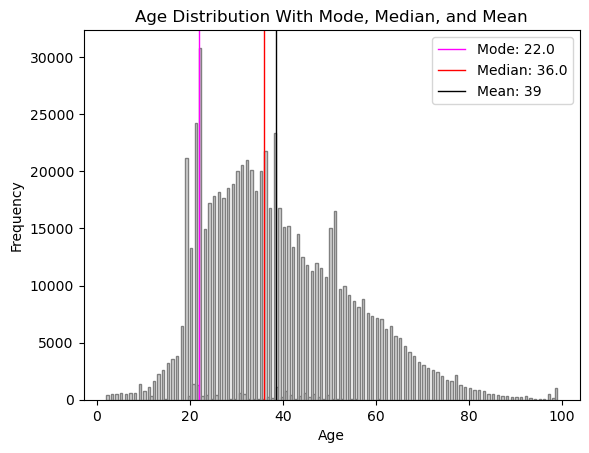

In [47]:
mode_age = la_crime['victim_age'].mode()[0]
median_age = la_crime['victim_age'].median()
mean_age = la_crime['victim_age'].mean() 

plt.hist(la_crime['victim_age'], bins='auto', edgecolor='grey', color = 'lightgrey') 

# Adding the mean, median, and mode lines
plt.axvline(mode_age, color = 'magenta', linestyle = '-', linewidth = 1, label=f'Mode: {mode_age}')
plt.axvline(median_age, color = 'Red', linestyle = '-', linewidth = 1, label = f'Median: {median_age}')
plt.axvline(mean_age, color = 'black', linestyle = '-', linewidth = 1, label = f'Mean: {round(mean_age)}')

plt.title("Age Distribution With Mode, Median, and Mean")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()

plt.show()

In [48]:
# Looking to see where victi_age has nulls
la_crime[la_crime['victim_age'].isnull()].sample(15) # Crime Codes with many NaN: 510 

,date_occurred,time_occurred,area,area_name,crime_code,crime_code_desc,victim_age,victim_sex,ethnicity,premis_code,status_desc,location,latitude,longitude,month_name,day_of_week
358016,2021-01-03,900,17,Devonshire,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,X,X,101.0,Invest Cont,17000 SIMONDS ST,34.2764,-118.5038,January,Sunday
35338,2020-10-30,2345,5,Harbor,946,OTHER MISCELLANEOUS CRIME,NaN,X,X,203.0,Invest Cont,1600 W CARSON ST,33.8315,-118.3069,October,Friday
255538,2021-01-10,1800,11,Northeast,510,VEHICLE - STOLEN,NaN,X,X,104.0,Invest Cont,6600 POLLARD ST,34.1177,-118.1731,January,Sunday
707497,2023-03-03,1900,19,Mission,510,VEHICLE - STOLEN,NaN,X,X,101.0,Invest Cont,8500 N SEPULVEDA BL,34.2267,-118.4704,March,Friday
820855,2023-04-09,130,18,Southeast,510,VEHICLE - STOLEN,NaN,X,X,108.0,Invest Cont,800 W 102ND ST,33.9438,-118.2894,April,Sunday
840927,2023-04-02,1400,16,Foothill,510,VEHICLE - STOLEN,NaN,X,X,101.0,Invest Cont,GLENOAKS,34.2841,-118.4227,April,Sunday
481478,2022-01-08,1840,11,Northeast,510,VEHICLE - STOLEN,NaN,X,X,101.0,Invest Cont,1700 TALMADGE ST,34.1018,-118.2831,January,Saturday
576225,2022-01-26,1200,20,Olympic,510,VEHICLE - STOLEN,NaN,X,X,707.0,Invest Cont,1300 S HOOVER ST,34.0457,-118.2878,January,Wednesday
374589,2021-02-14,1600,20,Olympic,510,VEHICLE - STOLEN,NaN,X,X,101.0,Invest Cont,WILSHIRE AV,34.0617,-118.3031,February,Sunday
235527,2021-02-07,2200,11,Northeast,510,VEHICLE - STOLEN,NaN,X,X,101.0,Invest Cont,2600 GLENDALE BL,34.1052,-118.2598,February,Sunday


In [49]:
# Check to see what the average victim age is for those with Crime Code 510

In [50]:
la_crime.groupby('crime_code')['victim_age'].median().sample(10)

crime_code
810    15.0
660    44.0
470    32.0
435    53.0
471    30.0
830    20.0
661    41.0
882    15.0
440    37.0
944    45.0
Name: victim_age, dtype: float64

In [51]:
la_crime[la_crime['crime_code']== 487] # There are no reported ages for those who reported a stolen boat. 

,date_occurred,time_occurred,area,area_name,crime_code,crime_code_desc,victim_age,victim_sex,ethnicity,premis_code,status_desc,location,latitude,longitude,month_name,day_of_week
46470,2020-11-09,1300,5,Harbor,487,BOAT - STOLEN,NaN,X,X,101.0,Invest Cont,400 E LOMITA BL,33.7989,-118.2685,November,Monday
55697,2020-04-30,310,8,West LA,487,BOAT - STOLEN,NaN,X,X,101.0,Invest Cont,SUNSET,34.0745,-118.4588,April,Thursday
64071,2020-08-24,2100,9,Van Nuys,487,BOAT - STOLEN,NaN,X,X,104.0,Invest Cont,15100 HESBY ST,34.1621,-118.4640,August,Monday
69795,2020-05-28,2200,5,Harbor,487,BOAT - STOLEN,NaN,X,X,101.0,Invest Cont,500 E LOMITA BL,33.7990,-118.2664,May,Thursday
71181,2020-07-11,1500,7,Wilshire,487,BOAT - STOLEN,NaN,X,X,101.0,Invest Cont,23RD,34.0361,-118.3392,July,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840558,2023-06-01,800,19,Mission,487,BOAT - STOLEN,NaN,X,X,101.0,Invest Cont,9700 BEACHY AV,34.2468,-118.4369,June,Thursday
841616,2023-04-24,1600,5,Harbor,487,BOAT - STOLEN,NaN,X,X,108.0,Invest Cont,700 PENINSULA RD,33.7649,-118.2485,April,Monday
846433,2023-01-24,2000,5,Harbor,487,BOAT - STOLEN,NaN,X,X,101.0,Invest Cont,300 N GRAND AV,33.7451,-118.2901,January,Tuesday
847713,2023-06-06,2200,5,Harbor,487,BOAT - STOLEN,NaN,X,X,101.0,Invest Cont,600 W 13TH ST,33.7324,-118.2902,June,Tuesday


In [52]:
 la_crime.groupby('crime_code')['victim_age'].median().sample(10)

crime_code
473    61.0
652    51.0
944    45.0
890    21.0
753    39.0
954    14.0
910    26.0
452    48.5
942    26.0
822    16.0
Name: victim_age, dtype: float64

In [53]:
# Investigating the crime that may be related to someone in the 0-9 year age bracket to see if there are any errors 
la_crime[la_crime['crime_code']== 237]

,date_occurred,time_occurred,area,area_name,crime_code,crime_code_desc,victim_age,victim_sex,ethnicity,premis_code,status_desc,location,latitude,longitude,month_name,day_of_week
863,2020-01-25,2040,1,Central,237,CHILD NEGLECT (SEE 300 W.I.C.),94.0,M,H,108.0,Adult Other,1700 S FIGUEROA ST,34.0388,-118.2717,January,Saturday
1528,2020-01-04,1500,2,Rampart,237,CHILD NEGLECT (SEE 300 W.I.C.),5.0,M,B,502.0,Adult Arrest,100 N OCCIDENTAL BL,34.0721,-118.2818,January,Saturday
2180,2020-10-27,1040,1,Central,237,CHILD NEGLECT (SEE 300 W.I.C.),3.0,F,B,102.0,Invest Cont,6TH,34.0439,-118.2479,October,Tuesday
2460,2020-01-03,1740,3,Southwest,237,CHILD NEGLECT (SEE 300 W.I.C.),7.0,F,H,502.0,Invest Cont,1400 W 42ND PL,34.0061,-118.3002,January,Friday
5724,2020-06-15,1430,18,Southeast,237,CHILD NEGLECT (SEE 300 W.I.C.),5.0,M,H,101.0,Adult Other,10300 CLOVIS AV,33.9427,-118.2565,June,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848557,2023-02-18,1630,9,Van Nuys,237,CHILD NEGLECT (SEE 300 W.I.C.),15.0,F,O,403.0,Adult Other,7200 WOODMAN AV,34.2012,-118.4312,February,Saturday
848683,2023-08-13,600,18,Southeast,237,CHILD NEGLECT (SEE 300 W.I.C.),10.0,F,H,501.0,Adult Other,200 E 87TH PL,33.9581,-118.2717,August,Sunday
850825,2023-02-06,1900,16,Foothill,237,CHILD NEGLECT (SEE 300 W.I.C.),11.0,M,H,501.0,Juv Other,10900 LUDDINGTON ST,34.2306,-118.3713,February,Monday
851426,2023-01-06,1100,17,Devonshire,237,CHILD NEGLECT (SEE 300 W.I.C.),4.0,M,H,502.0,Invest Cont,18400 PLUMMER ST,34.2428,-118.5338,January,Friday


In [54]:
# Repeat the process above to fill in nulls, this time grouping by the same variables excluding crime_code. 

In [55]:
grouped_data_medians = la_crime.groupby(['area','victim_sex', 'ethnicity'
                                          ])['victim_age'].median().reset_index() 

la_crime = la_crime.merge(grouped_data_medians, on = [ 'area', 'victim_sex', 'ethnicity'
                                                      ], how = 'left', suffixes = ('', '_median'))

la_crime['victim_age'] = la_crime['victim_age'].fillna(la_crime['victim_age_median']).astype(float)
la_crime.head(8)


,date_occurred,time_occurred,area,area_name,crime_code,crime_code_desc,victim_age,victim_sex,ethnicity,premis_code,status_desc,location,latitude,longitude,month_name,day_of_week,victim_age_median
0,2020-01-08,2230,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36.0,F,B,501.0,Adult Other,1100 W 39TH PL,34.0141,-118.2978,January,Wednesday,38.0
1,2020-01-01,330,1,Central,624,BATTERY - SIMPLE ASSAULT,25.0,M,H,102.0,Invest Cont,700 S HILL ST,34.0459,-118.2545,January,Wednesday,34.0
2,2020-02-13,1200,1,Central,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,20.0,X,X,726.0,Adult Arrest,200 E 6TH ST,34.0448,-118.2474,February,Thursday,20.0
3,2020-01-01,1730,15,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76.0,F,W,502.0,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019,January,Wednesday,39.0
4,2020-01-01,415,19,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31.0,X,X,409.0,Invest Cont,14400 TITUS ST,34.2198,-118.4468,January,Wednesday,22.5
5,2020-01-01,30,1,Central,121,"RAPE, FORCIBLE",25.0,F,H,735.0,Invest Cont,700 S BROADWAY,34.0452,-118.2534,January,Wednesday,32.0
6,2020-01-02,1315,1,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23.0,M,H,404.0,Invest Cont,700 S FIGUEROA ST,34.0483,-118.2631,January,Thursday,34.0
7,2020-01-04,40,1,Central,946,OTHER MISCELLANEOUS CRIME,54.0,X,X,726.0,Invest Cont,200 E 6TH ST,34.0448,-118.2474,January,Saturday,20.0


In [56]:
la_crime.drop(columns=['victim_age_median'], inplace = True)

In [57]:
la_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852940 entries, 0 to 852939
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date_occurred    852940 non-null  datetime64[ns]
 1   time_occurred    852940 non-null  int64         
 2   area             852940 non-null  int64         
 3   area_name        852940 non-null  object        
 4   crime_code       852940 non-null  int64         
 5   crime_code_desc  852940 non-null  object        
 6   victim_age       852922 non-null  float64       
 7   victim_sex       852940 non-null  object        
 8   ethnicity        852940 non-null  object        
 9   premis_code      852940 non-null  float64       
 10  status_desc      852940 non-null  object        
 11  location         852940 non-null  object        
 12  latitude         852940 non-null  float64       
 13  longitude        852940 non-null  float64       
 14  month_name       852

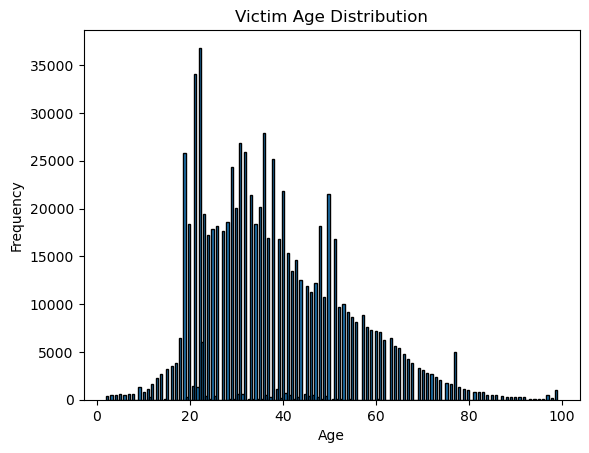

In [58]:
plt.hist(la_crime['victim_age'], bins='auto', edgecolor='black')
plt.title("Victim Age Distribution")
plt.ylabel("Frequency")
plt.xlabel("Age")
plt.show()

In [59]:
# Some general statistics on victim_age
la_crime['victim_age'].describe()

count    852922.000000
mean         37.996385
std          15.435178
min           2.000000
25%          26.000000
50%          36.000000
75%          48.000000
max          99.000000
Name: victim_age, dtype: float64

In [60]:
# Looks like there are only 18 remaining rows with nulls in the victim_age column. These rows will be deleted
la_crime.dropna(subset=['victim_age'], inplace = True)

In [61]:
la_crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 852922 entries, 0 to 852939
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date_occurred    852922 non-null  datetime64[ns]
 1   time_occurred    852922 non-null  int64         
 2   area             852922 non-null  int64         
 3   area_name        852922 non-null  object        
 4   crime_code       852922 non-null  int64         
 5   crime_code_desc  852922 non-null  object        
 6   victim_age       852922 non-null  float64       
 7   victim_sex       852922 non-null  object        
 8   ethnicity        852922 non-null  object        
 9   premis_code      852922 non-null  float64       
 10  status_desc      852922 non-null  object        
 11  location         852922 non-null  object        
 12  latitude         852922 non-null  float64       
 13  longitude        852922 non-null  float64       
 14  month_name       852922 n

In [62]:
# Save the transformed and clean dataset as CSV file
la_crime.to_csv('la_crime_v2.csv', index = False)

* Using SQL Server to further transform the data and drop rows with potential errors

In [63]:
la_crime.head(15)

,date_occurred,time_occurred,area,area_name,crime_code,crime_code_desc,victim_age,victim_sex,ethnicity,premis_code,status_desc,location,latitude,longitude,month_name,day_of_week
0,2020-01-08,2230,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36.0,F,B,501.0,Adult Other,1100 W 39TH PL,34.0141,-118.2978,January,Wednesday
1,2020-01-01,330,1,Central,624,BATTERY - SIMPLE ASSAULT,25.0,M,H,102.0,Invest Cont,700 S HILL ST,34.0459,-118.2545,January,Wednesday
2,2020-02-13,1200,1,Central,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,20.0,X,X,726.0,Adult Arrest,200 E 6TH ST,34.0448,-118.2474,February,Thursday
3,2020-01-01,1730,15,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76.0,F,W,502.0,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019,January,Wednesday
4,2020-01-01,415,19,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31.0,X,X,409.0,Invest Cont,14400 TITUS ST,34.2198,-118.4468,January,Wednesday
5,2020-01-01,30,1,Central,121,"RAPE, FORCIBLE",25.0,F,H,735.0,Invest Cont,700 S BROADWAY,34.0452,-118.2534,January,Wednesday
6,2020-01-02,1315,1,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23.0,M,H,404.0,Invest Cont,700 S FIGUEROA ST,34.0483,-118.2631,January,Thursday
7,2020-01-04,40,1,Central,946,OTHER MISCELLANEOUS CRIME,54.0,X,X,726.0,Invest Cont,200 E 6TH ST,34.0448,-118.2474,January,Saturday
8,2020-01-04,200,1,Central,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",23.0,M,B,502.0,Invest Cont,700 BERNARD ST,34.0677,-118.2398,January,Saturday
9,2020-05-26,1925,17,Devonshire,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",33.0,X,X,203.0,Adult Other,11900 BALBOA BL,34.2864,-118.5021,May,Tuesday


In [64]:
la_crime[la_crime['longitude'] ==0.000000] # When uploading to SQL server null values were placed in these rows


,date_occurred,time_occurred,area,area_name,crime_code,crime_code_desc,victim_age,victim_sex,ethnicity,premis_code,status_desc,location,latitude,longitude,month_name,day_of_week
1403,2020-05-27,1000,3,Southwest,900,VIOLATION OF COURT ORDER,56.0,F,H,502.0,Invest Cont,4800 COLISEUM ST,0.0,0.0,May,Wednesday
2108,2020-12-13,2300,7,Wilshire,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,29.0,M,K,101.0,Invest Cont,1000 QUEEN ANNE PL,0.0,0.0,December,Sunday
3157,2020-03-30,1620,2,Rampart,901,VIOLATION OF RESTRAINING ORDER,42.0,M,W,108.0,Invest Cont,1000 S ALVARADO ST,0.0,0.0,March,Monday
4902,2020-12-01,1340,8,West LA,440,THEFT PLAIN - PETTY ($950 & UNDER),33.0,X,X,101.0,Invest Cont,OLYMPIC BL,0.0,0.0,December,Tuesday
5084,2020-07-27,1220,17,Devonshire,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,34.0,M,A,108.0,Invest Cont,DEVONSHIRE ST,0.0,0.0,July,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408823,2021-01-01,1310,3,Southwest,626,INTIMATE PARTNER - SIMPLE ASSAULT,23.0,F,H,101.0,Invest Cont,ADAMS BL,0.0,0.0,January,Friday
497819,2022-08-12,2100,19,Mission,510,VEHICLE - STOLEN,22.5,X,X,108.0,Invest Cont,CHASE,0.0,0.0,August,Friday
699658,2023-05-01,730,2,Rampart,624,BATTERY - SIMPLE ASSAULT,24.0,F,H,101.0,Invest Cont,WASHINGTON BL,0.0,0.0,May,Monday
707701,2023-08-16,2010,16,Foothill,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",53.0,M,W,101.0,Adult Other,PENDLETON,0.0,0.0,August,Wednesday


* End of file